In [3]:
!pip install seaborn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
# removing ? ---> nan values
data=pd.read_csv('adult.csv',na_values='?')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


eda

In [7]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
data['workclass'].value_counts()
# what is the frequency of jobs

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [10]:
data['workclass'].unique()


array(['Private', 'Local-gov', nan, 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [11]:
data['workclass'].nunique()


8

In [12]:
# replace manually with replace ()
# data.replace('?',np.nan)

In [13]:
data.shape

(48842, 15)

In [14]:
data.index

RangeIndex(start=0, stop=48842, step=1)

In [15]:
data.describe()
# stats of all numeric data

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [17]:
data.describe(include='O')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [18]:
data.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,46043,4.884200e+04,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [19]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [20]:
# dropping null values
data=data.dropna()

In [21]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [22]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [23]:
#data['income']=data['income'].map({'<=50K':0,'>50K':1})

In [24]:
data['income']=data['income'].map({'<=50K':0,'>50K':1})


In [25]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


summery stats

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.5+ MB


In [27]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017,0.247844
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508,0.431766
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [28]:
# object data
data.describe(include='O')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
freq,33307,14783,21055,6020,18666,38903,30527,41292


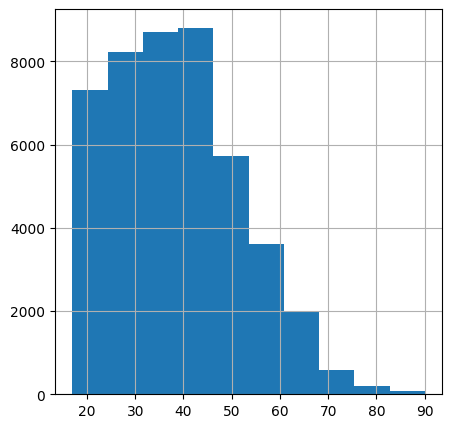

In [29]:
data['age'].hist(figsize=(5,5))
plt.show()

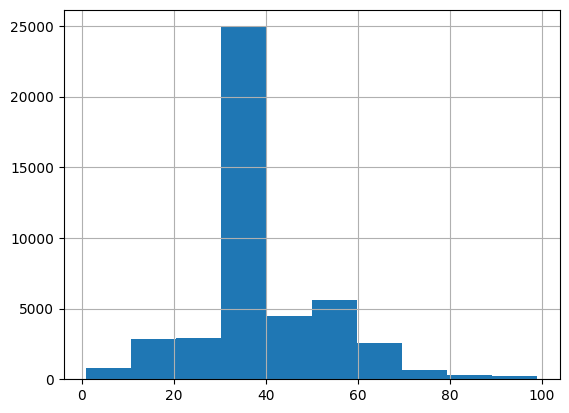

In [30]:
data['hours-per-week'].hist()
plt.show()

<ipython-input-31-c9b1376529be>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['hours-per-week'],bins=10,kde=False)


<Axes: xlabel='hours-per-week'>

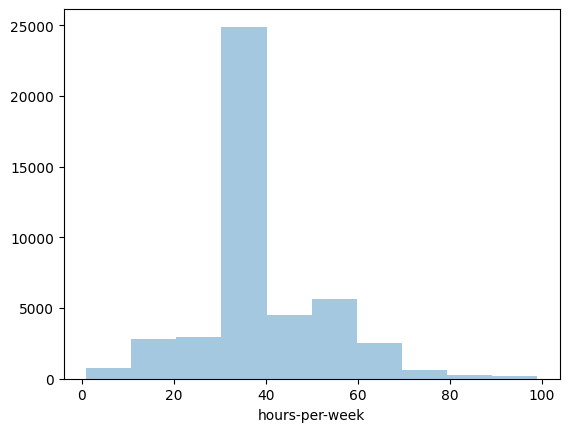

In [31]:
sns.distplot(data['hours-per-week'],bins=10,kde=False)

<ipython-input-32-aafd9172cc93>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['hours-per-week'],kde=True,bins=10)


<Axes: xlabel='hours-per-week', ylabel='Density'>

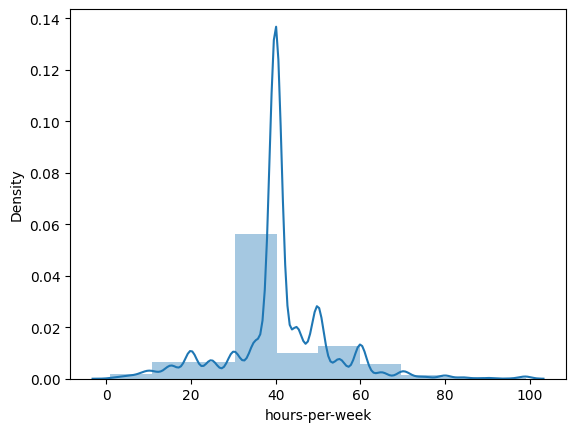

In [32]:
sns.distplot(data['hours-per-week'],kde=True,bins=10)

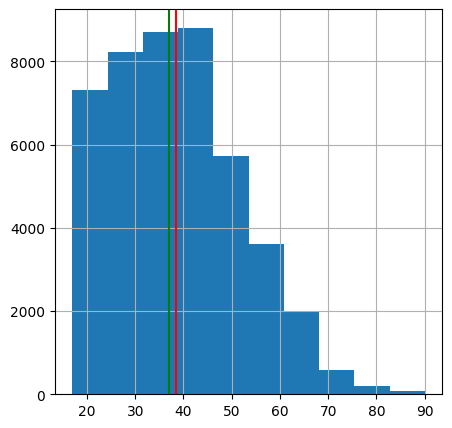

In [33]:
data['age'].hist(figsize=(5,5))
me=data['age'].mean()
med=data['age'].median()

plt.axvline(x=me,color='red',label='mean')
plt.axvline(x=med,color='green',label='median')

plt.show()

feature engineering


In [34]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [35]:
# converting gender column  as male =0 , female = 1
data['gender']=data['gender'].map({'Male':0 , 'Female':1})

In [36]:
data.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,0,50,United-States,0


In [37]:
data['marital-status'].value_counts()

Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: marital-status, dtype: int64

In [38]:
data['marital-status']=data['marital-status'].replace(['Never-married','Divorced','Separated' ,'Widowed'],'single')

In [39]:
data['marital-status'].value_counts()

single                   23583
Married-civ-spouse       21055
Married-spouse-absent      552
Married-AF-spouse           32
Name: marital-status, dtype: int64

In [40]:
data['marital-status']=data['marital-status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'],'married')

In [41]:
data['marital-status'].value_counts()

single     23583
married    21639
Name: marital-status, dtype: int64

In [42]:
data['marital-status']=data['marital-status'].map({'married':1,'single':0})

In [43]:
data['marital-status'].value_counts()

0    23583
1    21639
Name: marital-status, dtype: int64

In [44]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,0,Machine-op-inspct,Own-child,Black,0,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,1,Farming-fishing,Husband,White,0,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,1,Protective-serv,Husband,White,0,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,1,Machine-op-inspct,Husband,Black,0,7688,0,40,United-States,1
5,34,Private,198693,10th,6,0,Other-service,Not-in-family,White,0,0,0,30,United-States,0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  int64 
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  int64 
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 5.5+ MB


In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
from sklearn.preprocessing import LabelEncoder

#e = data.copy()

# creating instance for LabelEncoder
le = LabelEncoder()

# loop over columns
for i in data.columns:
  # find all object columns as le will be performed on obj data
  if data[i].dtype=='object':
    data[i]=le.fit_transform(data[i])


In [48]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,0,6,3,2,0,0,0,40,38,0
1,38,2,89814,11,9,1,4,0,4,0,0,0,50,38,0
2,28,1,336951,7,12,1,10,0,4,0,0,0,40,38,1
3,44,2,160323,15,10,1,6,0,2,0,7688,0,40,38,1
5,34,2,198693,0,6,0,7,1,4,0,0,0,30,38,0


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              45222 non-null  int64
 1   workclass        45222 non-null  int64
 2   fnlwgt           45222 non-null  int64
 3   education        45222 non-null  int64
 4   educational-num  45222 non-null  int64
 5   marital-status   45222 non-null  int64
 6   occupation       45222 non-null  int64
 7   relationship     45222 non-null  int64
 8   race             45222 non-null  int64
 9   gender           45222 non-null  int64
 10  capital-gain     45222 non-null  int64
 11  capital-loss     45222 non-null  int64
 12  hours-per-week   45222 non-null  int64
 13  native-country   45222 non-null  int64
 14  income           45222 non-null  int64
dtypes: int64(15)
memory usage: 5.5 MB


In [50]:
#  standardization

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
sc=StandardScaler()

In [53]:
# scaling is done only on independant data not on target variable ----> not talk about this
# now in this we will consider all columns indepependant n dependant

In [54]:
scaled=sc.fit_transform(data)

In [55]:
df=pd.DataFrame(scaled,columns=data.columns)

In [56]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,-1.024983,-0.213443,0.350889,-2.439977,-1.221559,-0.957898,0.007557,0.993798,-2.018744,-0.693813,-0.146733,-0.21878,-0.078120,0.262999,-0.574031
1,-0.041455,-0.213443,-0.945878,0.179902,-0.438122,1.043953,-0.489170,-0.884479,0.384110,-0.693813,-0.146733,-0.21878,0.754701,0.262999,-0.574031
2,-0.798015,-1.257163,1.393592,-0.868050,0.737034,1.043953,1.001011,-0.884479,0.384110,-0.693813,-0.146733,-0.21878,-0.078120,0.262999,1.742067
3,0.412481,-0.213443,-0.278420,1.227853,-0.046403,1.043953,0.007557,-0.884479,-2.018744,-0.693813,0.877467,-0.21878,-0.078120,0.262999,1.742067
4,-0.344079,-0.213443,0.084802,-2.701964,-1.613277,-0.957898,0.255921,-0.258387,0.384110,-0.693813,-0.146733,-0.21878,-0.910942,0.262999,-0.574031


In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
# dependant/target column = income

In [61]:
x=df.iloc[:,:14]

In [62]:
x

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,-1.024983,-0.213443,0.350889,-2.439977,-1.221559,-0.957898,0.007557,0.993798,-2.018744,-0.693813,-0.146733,-0.21878,-0.078120,0.262999
1,-0.041455,-0.213443,-0.945878,0.179902,-0.438122,1.043953,-0.489170,-0.884479,0.384110,-0.693813,-0.146733,-0.21878,0.754701,0.262999
2,-0.798015,-1.257163,1.393592,-0.868050,0.737034,1.043953,1.001011,-0.884479,0.384110,-0.693813,-0.146733,-0.21878,-0.078120,0.262999
3,0.412481,-0.213443,-0.278420,1.227853,-0.046403,1.043953,0.007557,-0.884479,-2.018744,-0.693813,0.877467,-0.21878,-0.078120,0.262999
4,-0.344079,-0.213443,0.084802,-2.701964,-1.613277,-0.957898,0.255921,-0.258387,0.384110,-0.693813,-0.146733,-0.21878,-0.910942,0.262999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,-0.873671,-0.213443,0.639611,-0.868050,0.737034,1.043953,1.497739,2.245982,0.384110,1.441310,-0.146733,-0.21878,-0.244684,0.262999
45218,0.109857,-0.213443,-0.334735,0.179902,-0.438122,1.043953,0.007557,-0.884479,0.384110,-0.693813,-0.146733,-0.21878,-0.078120,0.262999
45219,1.471665,-0.213443,-0.358060,0.179902,-0.438122,-0.957898,-1.482624,1.619890,0.384110,1.441310,-0.146733,-0.21878,-0.078120,0.262999
45220,-1.251951,-0.213443,0.111279,0.179902,-0.438122,-0.957898,-1.482624,0.993798,0.384110,-0.693813,-0.146733,-0.21878,-1.743763,0.262999


In [63]:
y=df['income']
y

0       -0.574031
1       -0.574031
2        1.742067
3        1.742067
4       -0.574031
           ...   
45217   -0.574031
45218    1.742067
45219   -0.574031
45220   -0.574031
45221    1.742067
Name: income, Length: 45222, dtype: float64

In [65]:
vif=pd.DataFrame()
# creating empty dataframe

# creating 2 columns ---> columns (all column names)
# 2. vif  ( all vif values)
vif['columns']=x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i)  for i in range(x.shape[1])]
vif

,columns,VIF
0,age,1.154640
1,workclass,1.017195
2,fnlwgt,1.013713
3,education,1.147521
4,educational-num,1.209903
5,marital-status,1.492988
6,occupation,1.017021
7,relationship,1.804130
8,race,1.034145
9,gender,1.628724


In [66]:
x.values

array([[-1.02498291, -0.2134431 ,  0.35088942, ..., -0.21878026,
        -0.07812006,  0.26299899],
       [-0.04145504, -0.2134431 , -0.94587846, ..., -0.21878026,
         0.7547014 ,  0.26299899],
       [-0.79801494, -1.25716323,  1.39359159, ..., -0.21878026,
        -0.07812006,  0.26299899],
       ...,
       [ 1.47166476, -0.2134431 , -0.35805983, ..., -0.21878026,
        -0.07812006,  0.26299899],
       [-1.25195088, -0.2134431 ,  0.11127873, ..., -0.21878026,
        -1.74376299,  0.26299899],
       [ 1.01772882,  0.83027703,  0.92951628, ..., -0.21878026,
        -0.07812006,  0.26299899]])

In [68]:
x.shape[1]

14